# Data Analysis and Visualisation &mdash; Lab 05

## Problem 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from setuptools.command.rotate import rotate
from scipy import stats

plt.style.use("ggplot")
plt.rcParams.update({
    "font.size": 12,
})

### Loading data

In [5]:
statcounter_ww = pd.read_csv("../data/linux-adoption/StatCounter_Worldwide.csv", parse_dates=["Date"])
statcounter_vn = pd.read_csv("../data/linux-adoption/StatCounter_Viet+Nam.csv", parse_dates=["Date"])

### Dataset Structure

**Explanation:**

Checking the dataset structure ensures it has the expected number of records and columns, and that the data types are appropriate for probability and statistics calculations.

In [24]:
statcounter_ww.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       34 non-null     datetime64[ns]
 1   Windows    34 non-null     float64       
 2   OS X       34 non-null     float64       
 3   Unknown    34 non-null     float64       
 4   Linux      34 non-null     float64       
 5   Chrome OS  34 non-null     float64       
 6   macOS      34 non-null     float64       
 7   Other      34 non-null     float64       
 8   Region     34 non-null     object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.5+ KB


**Summary:**

* The dataset has 34 records with 9 columns tracking OS market shares.
* No missing values, all columns properly typed for numeric and categorical analysis.

$\Rightarrow$ Ready for calculating probabilities, trends, and comparisons.

### Descriptive Statistics

We summarize the global (`statcounter_ww`) and Vietnam (`statcounter_vn`) desktop OS market share data to understand central tendencies, variability, and overall distribution patterns for each OS.

In [28]:
display(statcounter_ww.describe())
display(statcounter_vn.describe())

,Date,Windows,OS X,Unknown,Linux,Chrome OS,macOS,Other
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2024-05-16 15:31:45.882352896,70.720882,15.335882,6.796176,3.651176,2.396176,1.092647,0.007647
min,2023-01-01 00:00:00,62.060000,8.330000,3.030000,2.700000,1.020000,0.000000,0.000000
25%,2023-09-08 12:00:00,69.405000,14.290000,4.712500,3.082500,1.815000,0.000000,0.010000
50%,2024-05-16 12:00:00,71.570000,15.400000,6.330000,3.820000,2.245000,0.000000,0.010000
75%,2025-01-24 06:00:00,72.787500,17.002500,7.865000,4.050000,3.147500,0.000000,0.010000
max,2025-10-01 00:00:00,74.140000,21.320000,13.000000,4.550000,4.130000,5.580000,0.010000
std,NaN,2.846059,3.561124,2.706091,0.559939,0.879979,2.066862,0.004306


,Date,Windows,Unknown,OS X,Linux,macOS,Chrome OS,Other
count,34,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2024-05-16 15:31:45.882352896,69.240000,19.299412,7.778824,3.243824,0.374118,0.063235,0.000588
min,2023-01-01 00:00:00,37.540000,2.010000,0.470000,0.270000,0.000000,0.000000,0.000000
25%,2023-09-08 12:00:00,64.272500,12.497500,6.515000,2.292500,0.000000,0.052500,0.000000
50%,2024-05-16 12:00:00,71.455000,15.380000,8.710000,3.660000,0.000000,0.070000,0.000000
75%,2025-01-24 06:00:00,74.627500,22.057500,9.215000,4.205000,0.000000,0.080000,0.000000
max,2025-10-01 00:00:00,97.030000,55.950000,15.710000,5.060000,2.730000,0.090000,0.010000
std,NaN,12.310752,12.150896,2.931889,1.266451,0.834837,0.022391,0.002388


**Summary:**

* Global market is dominated by Windows (\~71% mean), with Linux slowly growing (\~6.8%) and macOS/OS X together around 5&ndash;6%.
* Vietnam shows slightly lower Windows share (\~69%) and higher OS X (\~19%) compared to global data; Linux is \~7.8%.
* Both datasets exhibit moderate variability (`std`), with Vietnam having more fluctuation in Windows and OS X shares.
* Minimum and maximum values highlight occasional spikes or drops, *e.g.*, Windows in Vietnam dips to 37.5% and peaks at 97%, suggesting local anomalies or reporting differences.

### Histogram

**Explanation:**

We compare the distribution of Linux market share between Worldwide and Vietnam using histogram and KDE to visualize density, peaks, and spread.

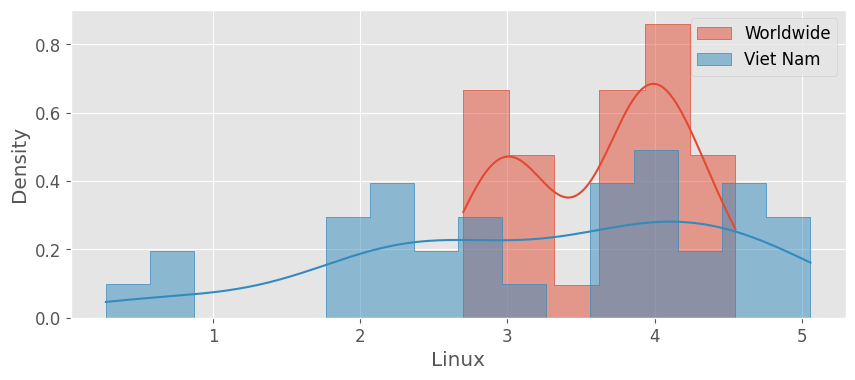

In [119]:
plt.figure(figsize=(10, 4))

common_histplot_options = {"binwidth": 0.3, "kde": True, "element": "step", "stat": "density"}

sns.histplot(statcounter_ww["Linux"], label="Worldwide", **common_histplot_options)
sns.histplot(statcounter_vn["Linux"], label="Viet Nam", **common_histplot_options)

plt.legend()

plt.show()

**Summary:**

* Vietnam’s Linux share is generally lower and more spread out than Worldwide.
* Worldwide data shows two peaks around 3.8&ndash;4.5%, suggesting common stable market levels.
* Vietnam’s share gradually rises to a peak then drops, covering a wider range (0.2&ndash;5%).
* No clear parametric distribution fits perfectly; the patterns hint at local adoption differences.

### Probabilities

The probability that Linux's worldwide market share exceeds 4%:

$$P(\text{Linux} > 4\%)$$

In [122]:
threshold = 4

P_linux_gt_thresh = (statcounter_ww["Linux"] > threshold).mean()
print(f"P(Linux > {threshold}%) = {P_linux_gt_thresh * 100:.2f}%")

P(Linux > 4%) = 35.29%


**Summary:**

Linux exceeds 4% roughly one-third of the time globally.

The probability that Windows share decreases while Linux share simultaneously increases:

$$P(\text{Windows} \downarrow \text{Linux} \uparrow)$$

In [127]:
win_pct_change = statcounter_ww["Windows"].pct_change()
linux_pct_change = statcounter_ww["Linux"].pct_change()

win_down = win_pct_change < 0
linux_up = linux_pct_change > 0

P_win_down_linux_up = (win_down & linux_up).mean()

print(f"P(Windows↓ & Linux↑) = {P_win_down_linux_up * 100:.2f}%")

P(Windows↓ & Linux↑) = 29.41%


**Summary:**

Around 29% of the time, Linux gains when Windows loses.

The probability that Linux share in Vietnam exceeds 4% given that the worldwide share is above 4%:

$$P(\text{Linux}(\text{Viet Nam}) > 4\%\;|\;\text{Linux}(\text{Worldwide}) > 4\%)$$

**Explanation:**

Bayes' Theorem:

$$P(A|B) = \frac{P(AB)}{P(B)}$$

where:

* $P(AB)$: The probability that Linux share in Vietnam exceeds 4% and Linux share worldwide exceeds 4%.
* $P(B)$: The probability that Linux share worldwide exceeds 4%.

In [133]:
linux_vn = statcounter_vn["Linux"]
linux_ww = statcounter_ww["Linux"]

thresh_vn = 4
thresh_ww = 4

vn_gt = linux_vn > thresh_vn
ww_gt = linux_ww > thresh_ww

vn_ww_gt = vn_gt & ww_gt
P_vn_given_ww = vn_ww_gt.sum() / ww_gt.sum()

print(f"P(Linux(Viet Nam) > {thresh_vn}% | Linux(Worldwide) > {thresh_ww}%) = {P_vn_given_ww * 100:.2f}%")

P(Linux(Viet Nam) > 4% | Linux(Worldwide) > 4%) = 66.67%


**Summary:**

When Linux is strong worldwide, there is a two-thirds chance it is also above 4% in Vietnam.